In [1]:
from pycocotools.coco import COCO
import pandas as pd

In [2]:
annFile = './annotations/captions_train2017.json'

In [3]:
coco=COCO(annFile)

loading annotations into memory...
Done (t=1.06s)
creating index...
index created!


In [27]:
annotations = coco.anns
annotation_dict = {'img_id':[], 'caption':[]}
for key, value in annotations.items():
    annotation_dict['img_id'].append(value['image_id'])
    annotation_dict['caption'].append(value['caption'])



In [29]:
annot_df = pd.DataFrame(data=annotation_dict)

In [6]:
import cv2
import matplotlib.pyplot as plt

In [23]:

def showfig(data):
    img_id = data[0]
    filename = './train2017/{}.jpg'.format(str(img_id).zfill(12))
    img = cv2.imread(filename)
    plt.imshow(img)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    print(data[1])

In [31]:
annot_df = annot_df.drop_duplicates(subset='img_id', keep='first')

In [32]:
annot_df.values

array([[203564, 'A bicycle replica with a clock as the front wheel.'],
       [322141, 'A room with blue walls and a white sink and door.'],
       [16977,
        'A car that seems to be parked illegally behind a legally parked car'],
       ...,
       [383652, 'A full fridge door sits open in an empty kitchen'],
       [133071,
        'Bread, sour cream, and guacamole are arrayed on a plate with a lemon slice.'],
       [180285, 'A couple of women with some stuffed animals.']],
      dtype=object)

In [34]:
annot_df = annot_df.reset_index(drop=True)

A car that seems to be parked illegally behind a legally parked car


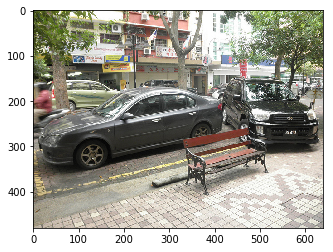

In [36]:
showfig(annot_df.values[2])

In [42]:
annot_df.to_csv('./coco-captions-2017.csv', index=False)

In [68]:
import pandas as pd
import numpy as np

In [43]:
test = pd.read_csv('./coco-captions-2017.csv')

In [52]:
test.values[0][1]

'A bicycle replica with a clock as the front wheel.'

In [49]:
from nltk.tokenize import sent_tokenize, word_tokenize 
import warnings 
  
warnings.filterwarnings(action = 'ignore') 
  
import gensim 
from gensim.models import Word2Vec 
  

In [53]:
annot_list = annot_df.values
data = [] 

# iterate through each caption 
for row in annot_list: 
    temp = [] 
      
    # tokenize the captions into words 
    for j in word_tokenize(row[1]): 
        temp.append(j.lower()) 
  
    data.append(temp) 
  


In [85]:
# Bag of words model
model1 = gensim.models.Word2Vec(data, min_count = 1,  
                              size = 100, window = 5) 
# Skip Gram model 
model2 = gensim.models.Word2Vec(data, min_count = 1, size = 100, 
                                window = 5, sg = 1) 

In [81]:
model1.most_similar(['wheel'])

[('owned', 0.7357432246208191),
 ('pedals', 0.7317389845848083),
 ('cel', 0.7301133871078491),
 ('concentrates', 0.7223474979400635),
 ('concept', 0.7094945311546326),
 ('handler', 0.7089557647705078),
 ('convertible', 0.7044292092323303),
 ('cable', 0.7028579115867615),
 ('remnants', 0.6998500823974609),
 ('tatoo', 0.6994329690933228)]

In [84]:
model2.most_similar(['wheel'])

[('steering', 0.8368488550186157),
 ('folding', 0.7954304218292236),
 ('porch', 0.7839035391807556),
 ('tire', 0.7798672914505005),
 ('hood', 0.7760705351829529),
 ('underwear', 0.7731279134750366),
 ('pit', 0.7657408714294434),
 ('strapped', 0.7657173275947571),
 ('bug', 0.7652230262756348),
 ('backseat', 0.7630614638328552)]

In [70]:
np.size(model2['wheel'])

100

In [74]:
word_set = set()
for row in annot_list:  
      
    # tokenize the sentence into words 
    for j in word_tokenize(row[1]): 
        word_set.add(j.lower()) 
  


In [76]:
len(word_set)

13898

In [134]:
new_word = model1['california'] + model1['city']

In [135]:
model1.most_similar(positive=[new_word])

[('city', 0.9981498718261719),
 ('town', 0.7838832139968872),
 ('busy', 0.7836923599243164),
 ('london', 0.7745339870452881),
 ('crosswalk', 0.7073225975036621),
 ('parade', 0.7065420150756836),
 ('highway', 0.6994484663009644),
 ('plaza', 0.6851513385772705),
 ('england', 0.6728837490081787),
 ('roadway', 0.6663275361061096)]